<a href="https://colab.research.google.com/github/Blackman9t/Python_-_Statistics_for_Financial_Analysis/blob/master/wk2_2_Frequency%2Band%2BDistribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

from PIL import Image as img

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


# Frequency and Distribution

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# To recall, this is the code to mimic the roll dice game for 50 times

die = pd.DataFrame([1, 2, 3, 4, 5, 6])
trial = 50
results = [die.sample(2, replace=True).sum().loc[0] for i in range(trial)]

In [0]:
# This is the code for summarizing the results of sum of faces by frequency

# create a data frame with the unique numbers in result as index and count of each number as corresponding column value 
freq = pd.DataFrame(results)[0].value_counts()
sort_freq = freq.sort_index()
print(sort_freq)

2      1
3      2
4      2
5      4
6      4
7     10
8     12
9      3
10     6
11     3
12     3
Name: 0, dtype: int64


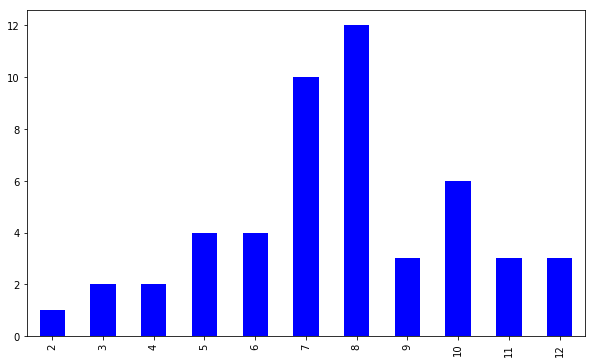

In [0]:
#plot the bar chart base on the result

sort_freq.plot(kind='bar', color='blue', figsize=(10, 6))

## Relative Frequency

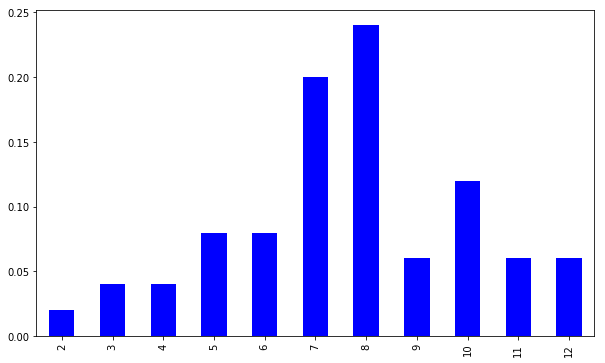

In [0]:
# Using relative frequency, we can rescale the frequency so that we can compare results from different number of trials
relative_freq = sort_freq/trial
relative_freq.plot(kind='bar', color='blue', figsize=(10, 6))

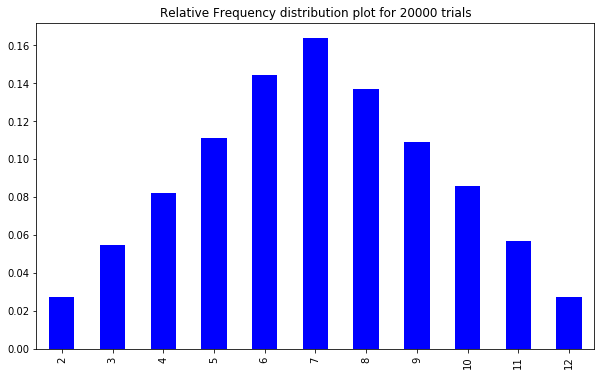

In [0]:
# Let us try to increase the number of trials to 10000, and see what will happen...
trial = 20000
results = [die.sample(2, replace=True).sum().loc[0] for i in range(trial)]
freq = pd.DataFrame(results)[0].value_counts()
sort_freq = freq.sort_index()
relative_freq = sort_freq/trial
relative_freq.plot(kind='bar', color='blue', figsize=(10, 6))
plt.title('Relative Frequency distribution plot for 20000 trials')
plt.show()

### We can see that with more trials, the result looks more and more stable, and this is very close to a probability distribution. Try increasing the number of "trial" further (but it may take some time for Jupyter Notebook to output the result)

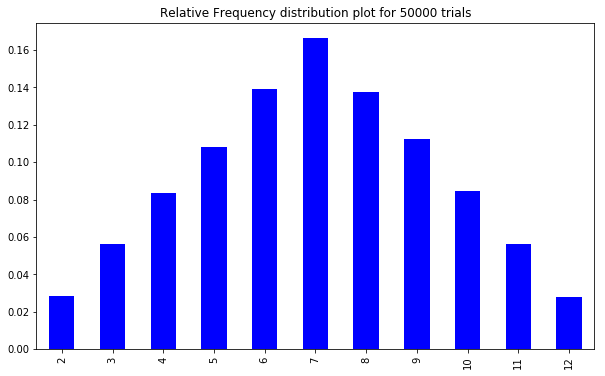

In [0]:
# Let us try to increase the number of trials to 10000, and see what will happen...
trial = 50000
results = [die.sample(2, replace=True).sum().loc[0] for i in range(trial)]
freq = pd.DataFrame(results)[0].value_counts()
sort_freq = freq.sort_index()
relative_freq = sort_freq/trial
relative_freq.plot(kind='bar', color='blue', figsize=(10, 6))
plt.title('Relative Frequency distribution plot for 50000 trials')
plt.show()

## Expectation and Variance of a distribution

Expectation is also known as the **mean**

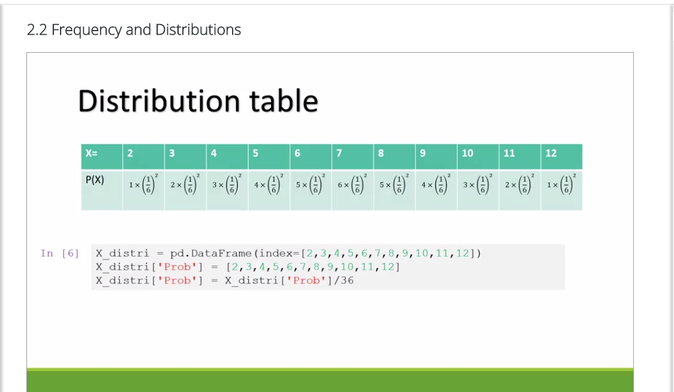

In [0]:
table = img.open('/content/gdrive/My Drive/Colab_Notebooks/python_and_statistics_for_financial_analysis/week_2/probability_distribution_table.png')

ratio = 3/5
new_width = int((table.size[0]) * ratio)
new_height = int((table.size[1]) * ratio)


table = table.resize((new_width,new_height), img.ANTIALIAS)

table

In [0]:
# assume that we have fair dice, which means all faces will be shown with equal probability
# then we can say we know the 'Distribtuion' of the random variable - sum_of_dice

X_distri = pd.DataFrame(index=[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
X_distri['Prob'] = [1, 2, 3, 4, 5, 6, 5, 4, 3, 2, 1]
X_distri['Prob'] = X_distri['Prob']/36
X_distri

,Prob
2,0.027778
3,0.055556
4,0.083333
5,0.111111
6,0.138889
7,0.166667
8,0.138889
9,0.111111
10,0.083333
11,0.055556


Total probability shoud equal to 1

In [0]:
sum(X_distri.Prob)

1.0000000000000002

In [0]:
mean = pd.Series(X_distri.index * X_distri['Prob']).sum()
mean

6.999999999999998

In [0]:
var = pd.Series(((X_distri.index - mean)**2)*X_distri['Prob']).sum()
var

5.833333333333333

In [0]:
#Output the mean and variance of the distribution. Mean and variance can be used to describe a distribution
print(mean, var)

6.999999999999998 5.833333333333333


## Empirical  mean and variance

In [0]:
# if we calculate mean and variance of outcomes (with high enough number of trials, eg 20000)...
trial = 20000
results = [die.sample(2, replace=True).sum().loc[0] for i in range(trial)]

In [0]:
#print the mean and variance of the 20000 trials
results = pd.Series(results)

In [0]:
print(results.mean(), results.var())

6.99735 5.778831919096178
